# Homework Week 12, Heather Leighton-Dick

## 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine Learning is a data analysis method that automates model building. Supervised ML is trained to draw causal inferences or to predict a class or quantity of an outcome (some examples include population growth models and weather or fiscal forecasting), while unsupervised ML is useful for grouping similar observations to show patterns and anomalies (e.g. customer segmentation and image recognition). In both kinds of ML, it is essential to have a well-labelled, consistent dataset of appropriate size for training a system which gives accurate results. Additionally, the organization should have in-house expertise in understanding the data, as well as data analysts and engineers.

In general, the machine learning method is best used to answer "why?" questions in ways that are interpretable and reproducible (that is, understandable by humans and able to be reproduced consistently according to a testing methodology). The organization should have clear observations and questions, as well as a clearly defined plan for building and iterating the model until it is ready to be integrated into practice in real time.

Machine learning models should not be the first response to a problem, used to solve less complex problems, or if there is a lack of clean data or in-house expertise. If the problem or question is not clearly defined at the outset, then the results will be misleading and possibly damaging. Models need to be tested regularly, and if the models don’t work, it may be time to gather more data, run qualitative research, or change the scope of the problem to be solved.

## 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [140]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

loans_orig = pd.read_csv("loans_full_schema.csv")
loans_df = pd.DataFrame(loans_orig)
#loans_df.tail(15)
loans_df.info()
#loans_df["emp_title"].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [141]:
# preprocessing the data

#convert issue_month to datetime
loans_df["issue_month"] = pd.to_datetime(loans_df["issue_month"])

#some columns: NaNs to 0
loans_df["emp_length"].fillna(0)
loans_df["annual_income"].fillna(0)
loans_df["months_since_last_credit_inquiry"].fillna(0)
loans_df["months_since_90d_late"].fillna(0)
loans_df["months_since_last_delinq"].fillna(0)

#column name change for clarity
loans_df.rename(columns={'term': 'term_length'})

#clean up emp_title column
loans_df["emp_title"].fillna("not given")
loans_df["emp_title"].str.rstrip()

0       global config engineer
1       warehouse office clerk
2                     assembly
3             customer service
4          security supervisor
                 ...          
9995                     owner
9996                  director
9997                 toolmaker
9998                   manager
9999        operations analyst
Name: emp_title, Length: 10000, dtype: object

## 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

,state,homeownership,annual_income,verified_income,debt_to_income,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,loan_amount,interest_rate
0,NJ,MORTGAGE,90000.0,Verified,18.01,2001,6,28,10,70795,...,14,8,6,1,92.9,0,0,moving,28000,14.07
1,HI,RENT,40000.0,Not Verified,5.04,1996,1,30,14,28800,...,24,14,4,0,100.0,0,1,debt_consolidation,5000,12.61
2,WI,RENT,40000.0,Source Verified,21.15,2006,4,31,10,24193,...,14,8,6,0,93.5,0,0,other,2000,17.09
3,PA,RENT,30000.0,Not Verified,10.16,2007,0,4,4,25400,...,3,3,2,0,100.0,1,0,debt_consolidation,21600,6.72
4,CA,RENT,35000.0,Verified,57.96,2008,7,22,16,69839,...,20,15,13,0,100.0,0,0,credit_card,23000,14.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX,RENT,108000.0,Source Verified,22.28,2008,5,44,13,199195,...,22,9,4,1,100.0,0,1,other,24000,7.35
9996,PA,MORTGAGE,121000.0,Verified,32.38,1994,1,28,15,382061,...,18,11,8,2,82.1,0,0,debt_consolidation,10000,19.03
9997,CT,MORTGAGE,67000.0,Verified,45.26,2004,0,18,11,346402,...,9,7,5,2,72.2,0,0,debt_consolidation,30000,23.88
9998,WI,MORTGAGE,80000.0,Source Verified,11.99,1999,1,38,15,294475,...,15,9,2,6,100.0,0,0,other,24000,5.32


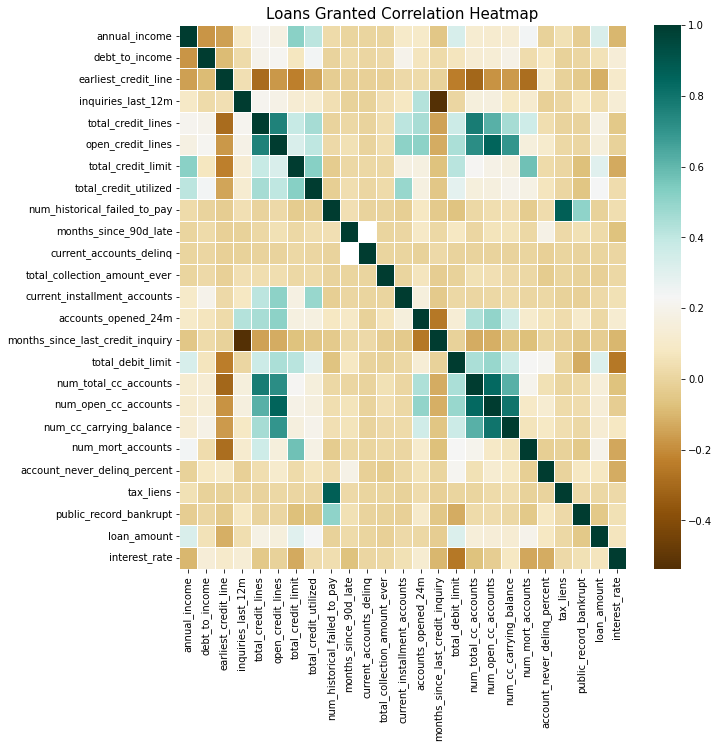

In [142]:
#correlation matrix and heatmap
loans_variables_df = loans_df.iloc[:, [2,3,4,5,6,12,13,14,15,16,17,19,20,21,22,23,24,25,30,31,32,33,34,35,36,37,38,40,42]]
loans_corr_mat = loans_variables_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
loans_heatmap = sns.heatmap(loans_corr_mat, annot=False, cbar=True, ax=ax, linewidths=.5, cmap="BrBG")
loans_heatmap.set_title("Loans Granted Correlation Heatmap", size=15)

loans_variables_df

The heatmap shows factors associated with people who were granted loans in Jan-Mar 2018. Stronger correlation (positive or negative) corresponds to darker colors, while weaker correlation is in lighter shades. I see positive correlations in the total/open credit card accounts portions, as well total/open credit lines. In other words, people with more open credit card accounts and more open credit lines were granted loans. I also see negative correlations with credit inquiries within the last 12 months, and there is an interesting point of negative correlation between total debt limit and the interest rate set for the loan.

## 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

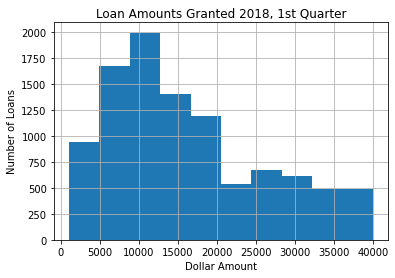

In [143]:
#finding dimensions of the loan_amount column
loans_df["loan_amount"].describe()

#range is 1000 to 40000 --> 8 bins of 5000 each, not enough detail; 10 bins of 4000 each
# bins as factors of 40
#histogram showing frequency of loan_amounts
loans_df["loan_amount"].hist(bins=10)
plt.title("Loan Amounts Granted 2018, 1st Quarter")
plt.xlabel("Dollar Amount")
plt.ylabel("Number of Loans")
plt.show()

I chose my bin sizes by looking at the min and max values of the loan_amount column, and then thinking about possible factor combinations (8x5, 10x4, 20x2, etc). I tried 8x5 first (8 bins of 5000 each), but it seemed too simplistic; then I tried 10x4 (10 bins of 4000 each), which seems to give more nuance.

Looking at the histogram, I see that the majority of the loans granted during this period are below 20,000, and the amounts of those loans vary more than the loans that are above 20,000. The loan granted with the greatest frequency is between 8,000 and 12,000, followed closely by loans between 5,000 and 8,000.

## 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.

In [144]:
# divide states (by abbrev) into regions, based on US Census Bureau designated regions (found on Wikipedia)
Pacific = ["CA", "WA", "OR", "AK", "HI"]
Plains = ["MT", "ID", "AZ", "CO", "NV", "NM", "UT", "WY"]
Midwest = ["IA", "MO", "MN", "KS", "NE", "ND", "SD", "IL", "MI", "OH", "WI", "IN"]
Northeast = ["CT", "ME", "RI", "MA", "NH", "VT", "NY", "NJ", "PA"]
South = ["FL", "DE", "GA", "MD", "AL", "MS", "LA", "VA", "WV", "NC", "SC", "TN", "KY", "AR", "TX", "OK"]

loans_df["region"] = loans_df["state"].apply(lambda x: "Pacific" if loans_df["state"].isin(Pacific).any() else ("Plains" if loans_df["state"].isin(Plains).any() else ("Midwest" if loans_df["state"].isin(Midwest).any() else ("Northeast" if loans_df["state"].isin(Northeast).any() else "South"))))

### a.	Is there a better way to do this than with a lambda?

In [145]:
conditions = [
    (loans_df["state"].isin(Pacific)),
    (loans_df["state"].isin(Plains)),
    (loans_df["state"].isin(Midwest)),
    (loans_df["state"].isin(Northeast)),
    (loans_df["state"].isin(South))]

values = ["Pacific", "Plains", "Midwest", "Northeast", "South"]
loans_df["region"] = np.select(conditions, values)

loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,2018-03-01,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,2018-02-01,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,2018-02-01,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,2018-01-01,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,2018-03-01,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


### b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [4]:
# two lambdas OR lambda plus different technique; check performance (timer from Week 12 webpage link)



explain what you found out

## 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

Text(15.125, 0.5, 'Loan Count')

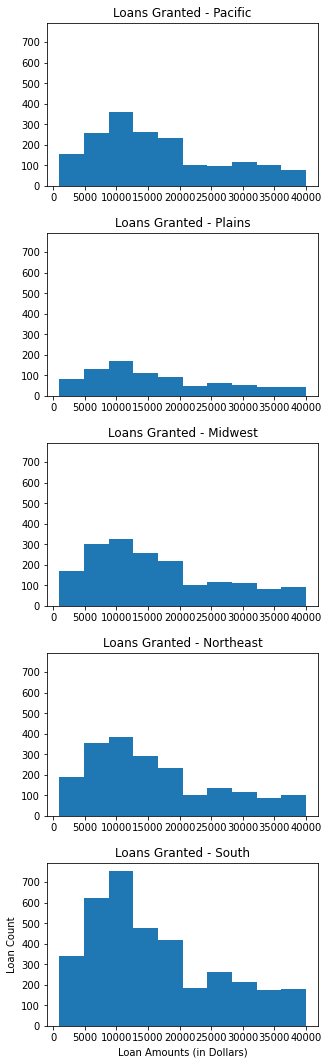

In [180]:
# create separate dataframes for loans in each region
loans_Pacific = loans_df.loc[loans_df["region"]=="Pacific"]
loans_Plains = loans_df.loc[loans_df["region"]=="Plains"]
loans_Midwest = loans_df.loc[loans_df["region"]=="Midwest"]
loans_Northeast = loans_df.loc[loans_df["region"]=="Northeast"]
loans_South = loans_df.loc[loans_df["region"]=="South"]

#create subplots
fig, ax = plt.subplots(5,1, sharey=True, figsize=(5,15))
ax[0].hist(loans_Pacific["loan_amount"], bins=10)
ax[1].hist(loans_Plains["loan_amount"], bins=10)
ax[2].hist(loans_Midwest["loan_amount"], bins=10)
ax[3].hist(loans_Northeast["loan_amount"], bins=10)
ax[4].hist(loans_South["loan_amount"], bins=10)
fig.tight_layout(pad=3.0)

#labelling subplots (x and y labels only worked on the bottom graph -- why?)
ax[0].title.set_text("Loans Granted - Pacific")
ax[1].title.set_text("Loans Granted - Plains")
ax[2].title.set_text("Loans Granted - Midwest")
ax[3].title.set_text("Loans Granted - Northeast")
ax[4].title.set_text("Loans Granted - South")

plt.xlabel('Loan Amounts (in Dollars)')
plt.ylabel('Loan Count')
#fig.suptitle('Loans By Region', fontsize=24)

I was surprised to see that the overall distribution shape of the entire data set held in each region (majority of loans below 20,000, and relatively equal-ish numbers of loans across the bins from 20,000 to 40,000). The most loans granted during this period were in the South, while the fewest loans were granted in the Plains region.

## 7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure it's thoughtful.

What kind of training program did you go through to prepare for your career?

Do you have any recommendations for individual classes or subjects?

Any memorable interview questions? Pointers for interviews, especially over video call?

Do you have any go-to websites for good answers to code problems/errors?

How much of your job is spent coding, and how many code languages do you know?

When your code isn't working correctly and you've spent a fair amount of time on it, what do you do to get a fresh perspective?

## Certificates

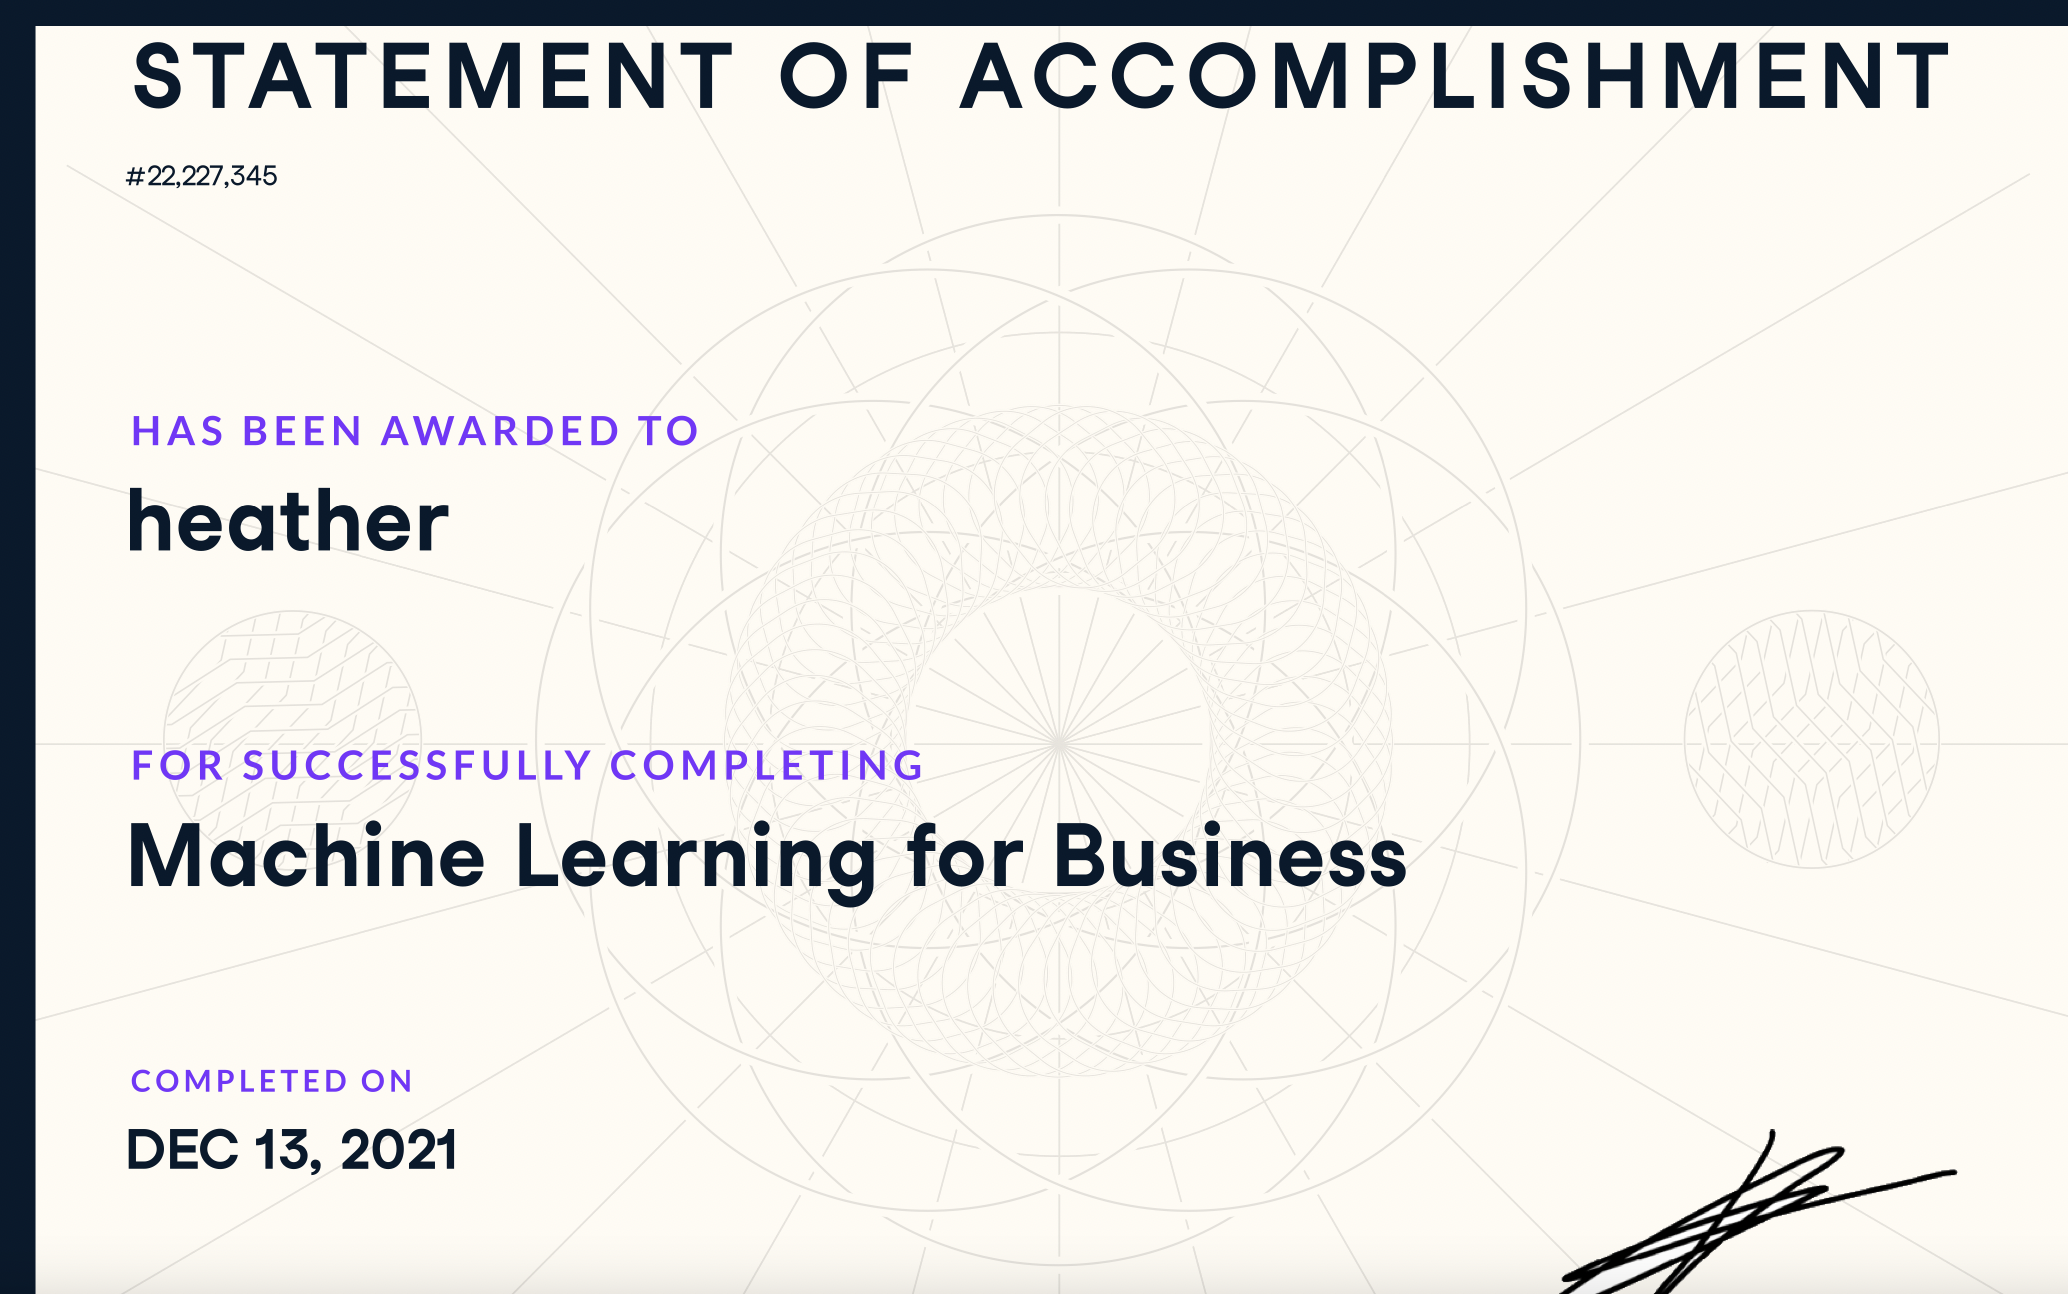

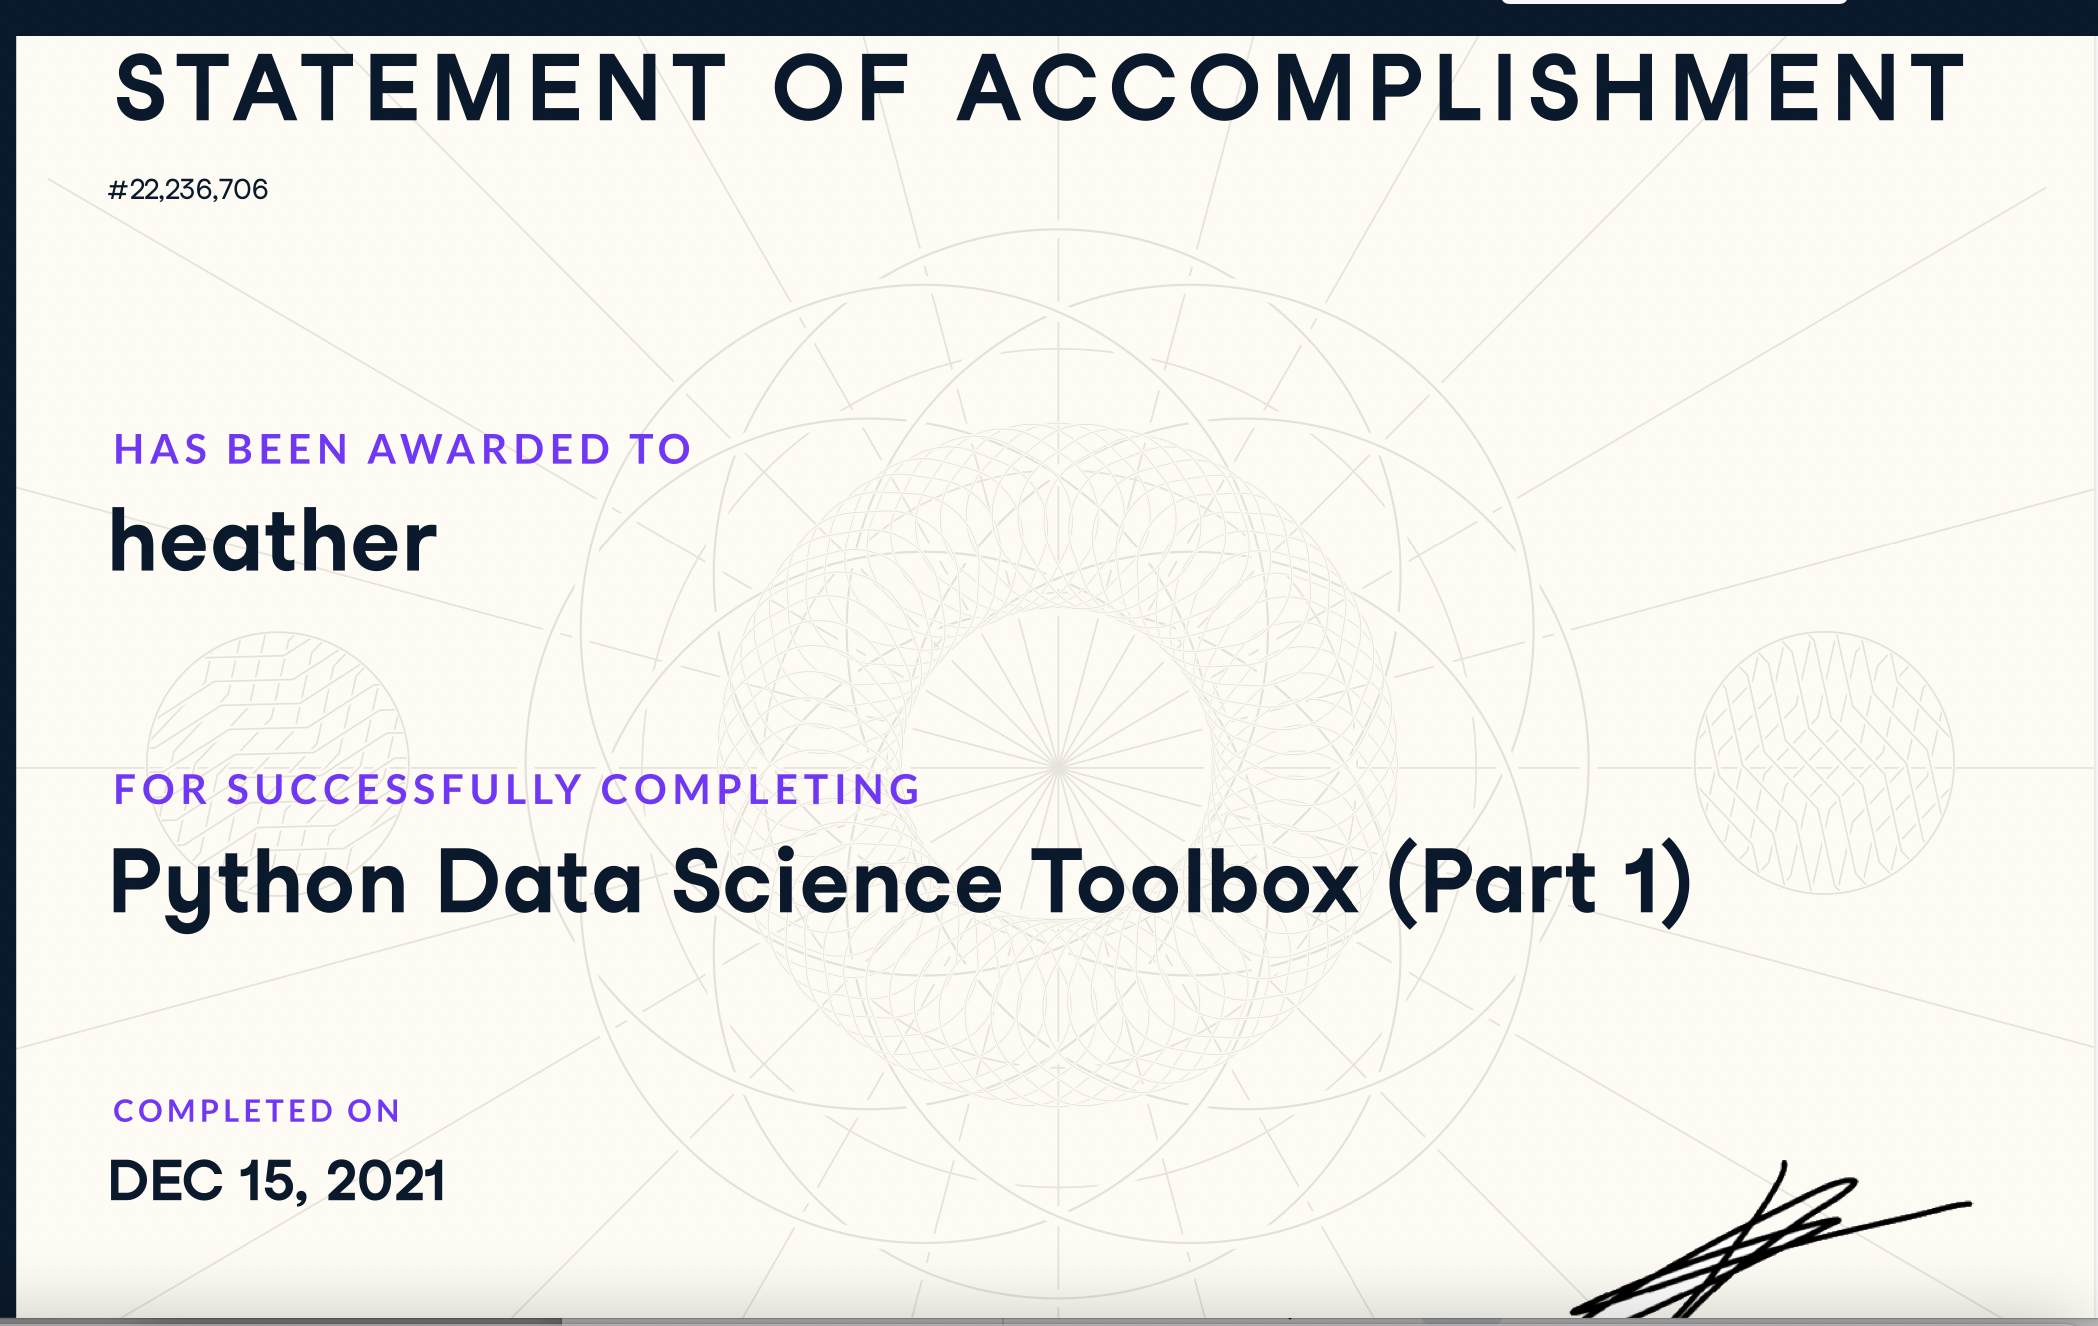